![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
data.rename(columns = {'Chance of Admit ': 'Chance of Admit'}, inplace = True)
data.rename(columns = {'LOR ': 'LOR'}, inplace = True)

In [6]:
data.columns = data.columns.str.strip()

In [7]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

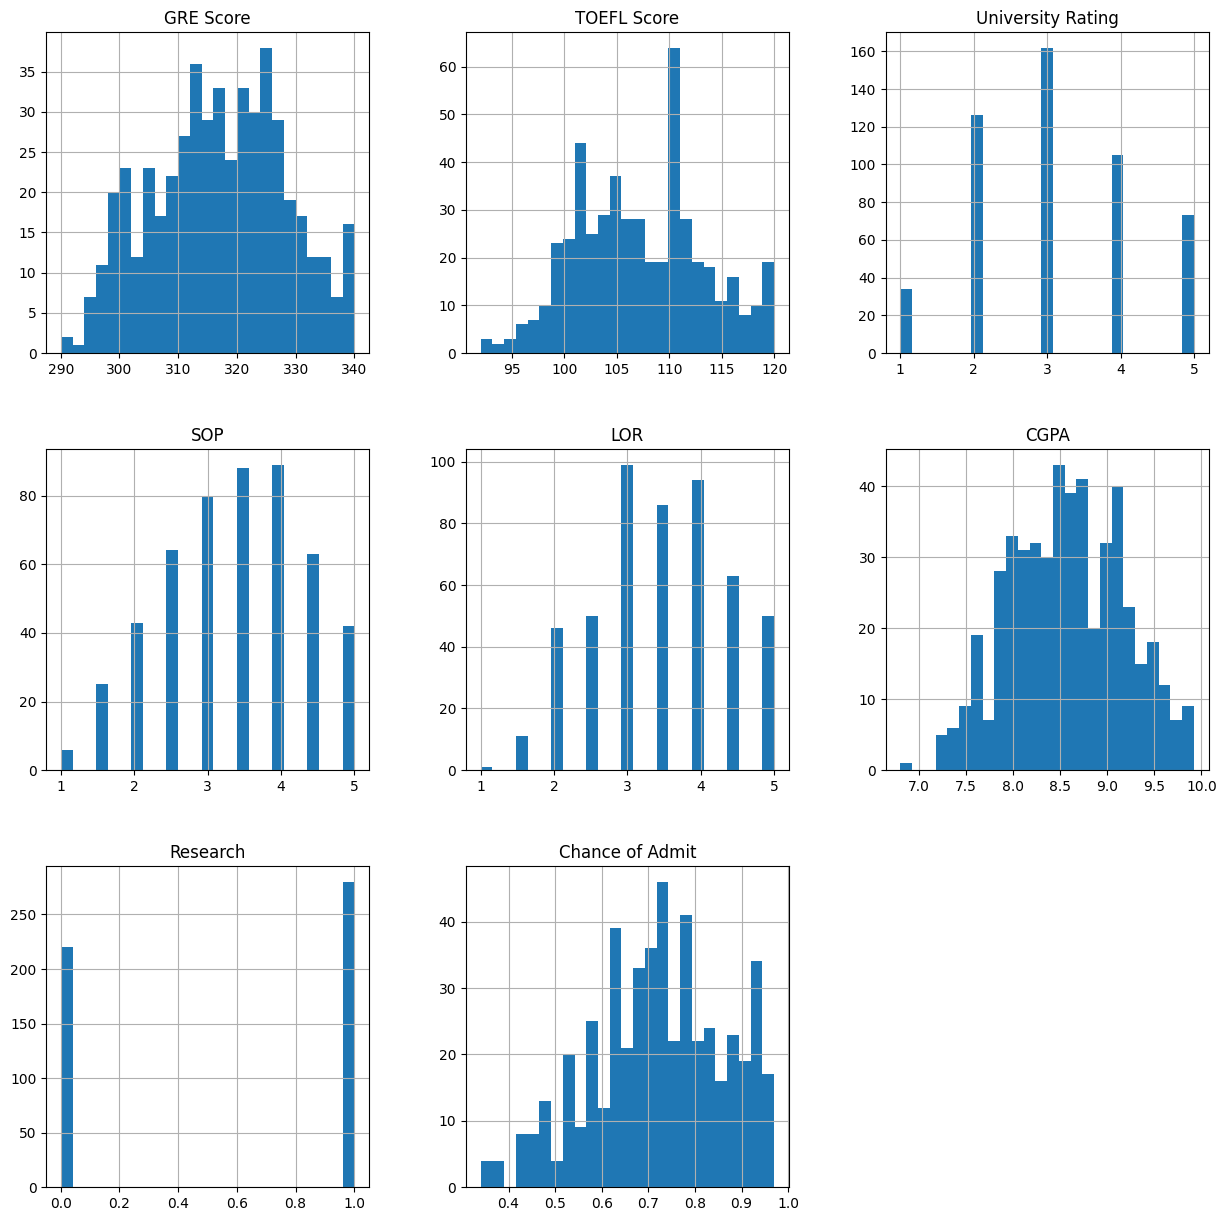

In [8]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [9]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
#y = data[data.columns[-1]]
y = pd.DataFrame(np.array(data.iloc[:,-1]))

In [10]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X,y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [11]:
#!pip install livelossplot

In [12]:
# librerias

# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import initializers
from keras import optimizers
from keras.layers import Dropout

from sklearn import metrics

In [13]:
# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
XTrain = pd.DataFrame(data=scaler.transform(XTrain), columns=XTrain.columns, index=XTrain.index)
XTest = pd.DataFrame(data=scaler.transform(XTest), columns=XTest.columns, index=XTest.index)

XTrain = np.array(XTrain)
yTrain = np.array(yTrain)

XTest = np.array(XTest)
yTest = np.array(yTest)

In [14]:
# Definición de dimensiones de salida, varaibles de interés
output_var = yTrain.shape[1]
print(output_var, ' output variables')

1  output variables


In [15]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = XTrain.shape[1]
print(dims, 'input variables')

7 input variables


In [16]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

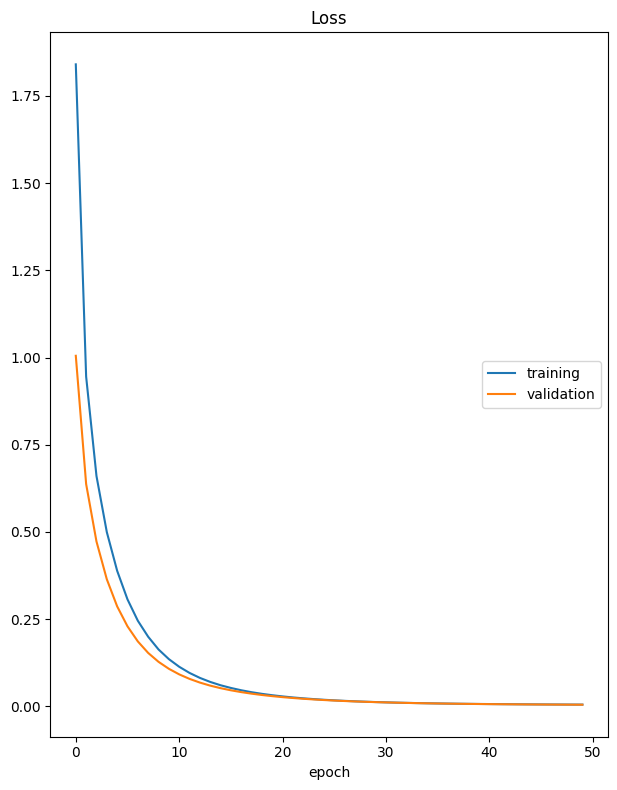

Loss
	training         	 (min:    0.005, max:    1.841, cur:    0.005)
	validation       	 (min:    0.005, max:    1.005, cur:    0.005)
11/11 [==============================] - 0s 39ms/step - loss: 0.0049 - val_loss: 0.0046


In [18]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(XTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(XTest, yTest),
          callbacks=[PlotLossesKeras()])

In [19]:
yPred=model.predict(XTest)

5/5 [==============================] - 0s 2ms/step


In [20]:
# Calculate mae
RNLmae = metrics.mean_absolute_error(yTest, yPred)
print("Mean squared error RNLmae:" , RNLmae)

Mean squared error RNLmae: 0.05168126118977864


In [21]:
# Calculate mse
RNLmse = metrics.mean_squared_error(yTest, yPred)
print("Mean squared error RNLmse:" , RNLmse)

Mean squared error RNLmse: 0.004613629061603583


Conclusion: Se realiza pruebas con epoch desde 50 hasta 300, se encuentra que en todas las pruebas el valor del epoch no genera un distanciamiento entre las dos lineas de entrenamiento y validacion. Es por esto que se toma 50 para el entranamiento.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [22]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

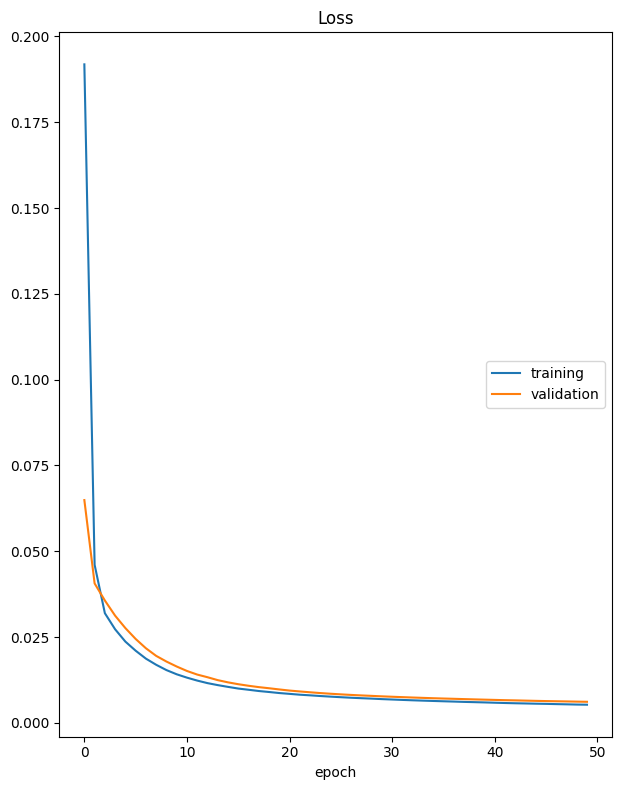

Loss
	training         	 (min:    0.005, max:    0.192, cur:    0.005)
	validation       	 (min:    0.006, max:    0.065, cur:    0.006)
11/11 [==============================] - 0s 41ms/step - loss: 0.0053 - val_loss: 0.0061


In [24]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(XTrain, yTrain,
          validation_data = (XTest, yTest),
          epochs=50, 
          callbacks=[PlotLossesKeras()])

In [25]:
yPredMl=model.predict(XTest)

5/5 [==============================] - 0s 3ms/step


In [26]:
# Calculate mae
RNMLmae = metrics.mean_absolute_error(yTest, yPredMl)
print("Mean squared error RNMLmae:" , RNMLmae)

Mean squared error RNMLmae: 0.061388865431149804


In [27]:
# Calculate mse
RNMLmse = metrics.mean_squared_error(yTest, yPredMl)
print("Mean squared error RNMLmse:" , RNMLmse)

Mean squared error RNMLmse: 0.006127123711433351


## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [28]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

model.compile(loss='mse', optimizer='adam')

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

In [30]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

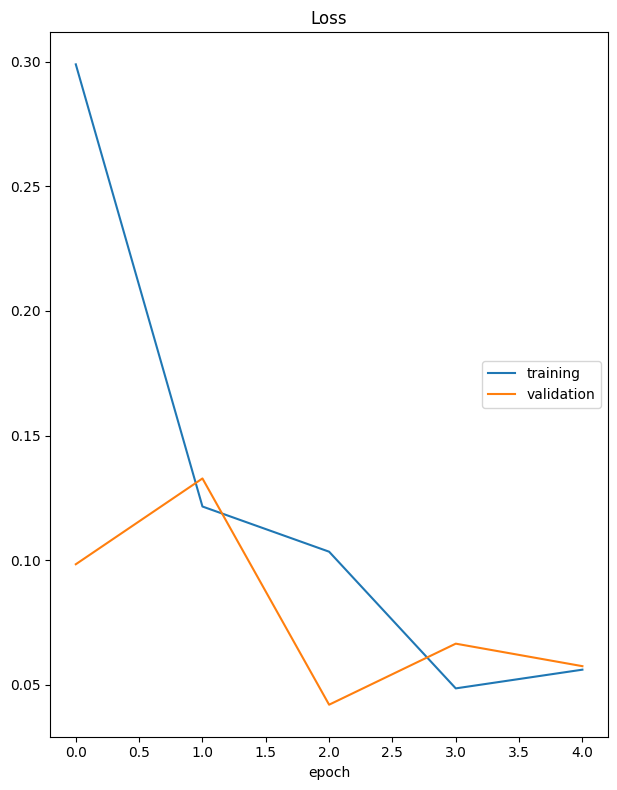

Loss
	training         	 (min:    0.049, max:    0.299, cur:    0.056)
	validation       	 (min:    0.042, max:    0.133, cur:    0.057)
3/3 [==============================] - 1s 276ms/step - loss: 0.0561 - val_loss: 0.0575
Epoch 5: early stopping


In [31]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(XTrain, yTrain, 
          verbose=True, 
          epochs=50, 
          batch_size=128,
          validation_data=(XTest,yTest),
          callbacks=[best_model, early_stop, PlotLossesKeras()])

In [32]:
yPredMlD=model.predict(XTest)

5/5 [==============================] - 0s 4ms/step


In [33]:
# Calculate mae
RNMLDmae = metrics.mean_absolute_error(yTest, yPredMlD)
print("Mean squared error RNMLDmae:" , RNMLDmae)

Mean squared error RNMLDmae: 0.21685805262724556


In [34]:
# Calculate mse
RNMLDmse = metrics.mean_squared_error(yTest, yPredMlD)
print("Mean squared error RNMLDmse:" , RNMLDmse)

Mean squared error RNMLDmse: 0.057487093822392685


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [35]:
# Una capa

# Calculate mse
RNLmse = metrics.mean_squared_error(yTest, yPred)
print("Mean squared error RNLmse:" , RNLmse)

# Calculate mae
RNLmae = metrics.mean_absolute_error(yTest, yPred)
print("Mean squared error RNLmae:" , RNLmae)



# Multicapa

# Calculate mae
RNMLmae = metrics.mean_absolute_error(yTest, yPredMl)
print("Mean squared error RNMLmae:" , RNMLmae)

# Calculate mse
RNMLmse = metrics.mean_squared_error(yTest, yPredMl)
print("Mean squared error RNMLmse:" , RNMLmse)


# Con Early Stopper

# Calculate mae
RNMLDmae = metrics.mean_absolute_error(yTest, yPredMlD)
print("Mean squared error RNMLDmae:" , RNMLDmae)

# Calculate mse
RNMLDmse = metrics.mean_squared_error(yTest, yPredMlD)
print("Mean squared error RNMLDmse:" , RNMLDmse)

Mean squared error RNLmse: 0.004613629061603583
Mean squared error RNLmae: 0.05168126118977864
Mean squared error RNMLmae: 0.061388865431149804
Mean squared error RNMLmse: 0.006127123711433351
Mean squared error RNMLDmae: 0.21685805262724556
Mean squared error RNMLDmse: 0.057487093822392685
